In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats.contingency import association
from scipy.stats import chi2_contingency

df=pd.read_csv('amazon_database.csv')
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [7]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [6]:
df.shape

(2443651, 9)

In [2]:
pd.set_option('display.max_columns', None)

Crosstab Analysis:

Create a crosstab between the product category and the isBestSeller status.

Are there categories where being a best-seller is more prevalent?

Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.



In [11]:
cross=pd.crosstab(df['category'],df['isBestSeller'])

In [48]:
df_2=df[df.isBestSeller==True]
df_2.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
15,16,B09B97BPSW,"Echo Dot Kids (5th generation, 2022 release) |...",4.6,1017,26.99,True,0,Hi-Fi Speakers
17,18,B09B8XRZYB,"Echo Dot Kids (5th generation, 2022 release) |...",4.6,1017,26.99,True,0,Hi-Fi Speakers
36,37,B08L84ST93,Bose Solo Soundbar Series II - TV Speaker with...,4.6,2799,169.00,True,0,Hi-Fi Speakers
55,56,B08CMJ2YZX,"Sanyun SW208 3"" Active Bluetooth 5.0 Bookshelf...",4.4,974,59.49,True,0,Hi-Fi Speakers


In [51]:
cross_2=pd.crosstab(df_2['category'],df_2['isBestSeller'])
cross_2.sort_values(by=True,ascending=False)

isBestSeller,True
category,
Grocery,556
Health & Personal Care,552
Baby,341
Sports & Outdoors,330
Power & Hand Tools,306
...,...
"Motorbike Handlebars, Controls & Grips",1
I/O Port Cards,1
Smart Speakers,1


This crosstabs gives us how many best sellers per category, Cross_2 was a failed attempt to filter only the ones that actually have a best seller between them, Cramer and Chi gives us no relations because after filtering I deleted the datas that would create the relations

In [60]:
cross=cross.sort_values(by=True,ascending=False)

In [73]:
cross=cross[cross["False"]!=835935]
#This doesnt work and i dont know why
cross=cross[cross["isBestSeller"]!='Sports & Outdoors']


KeyError: 'False'

In [74]:
cross=cross[cross[False]!=835935]

We organize it and find that Grocery and Health & Personal Care are the ones with most best sellers out of all of the categories, we find also that Sports and Outdoors are the ones that have the most number of books. There is also a relation to book published and big hits as it should be normal.

In [29]:
estadistico, p_valor, ex, ddof = chi2_contingency(cross)

estadistico, p_valor

(36540.20270061387, 0.0)

In [36]:
association(cross,method='cramer')


0.1222829439760564

In [76]:
cross

isBestSeller,False,True
category,,
Grocery,9008,556
Health & Personal Care,9017,552
Baby,14709,341
Power & Hand Tools,8353,306
Beauty,19010,302
...,...,...
Downhill Ski Boots,1284,0
Digital Frames,774,0
Motorbike Chassis,107,0


NameError: name 'false' is not defined

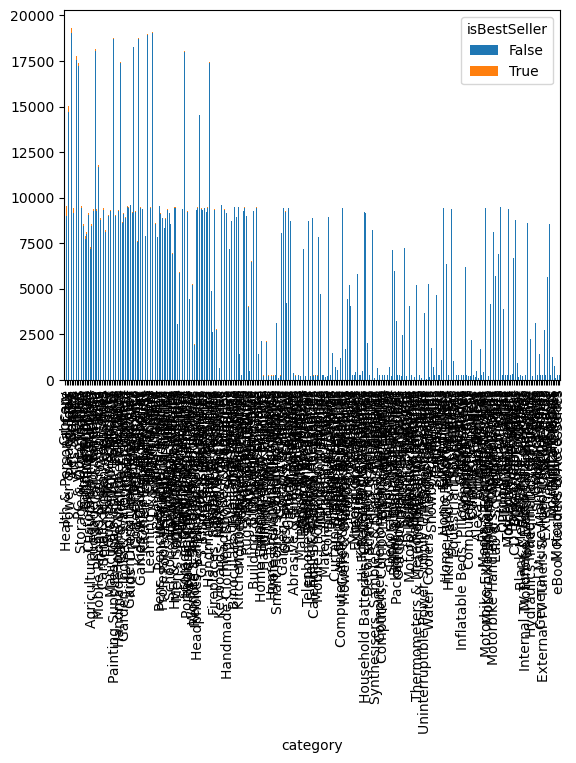

In [81]:
cross.plot(kind='bar',stacked=True)
plt.xticks(visible=false)
plt.show

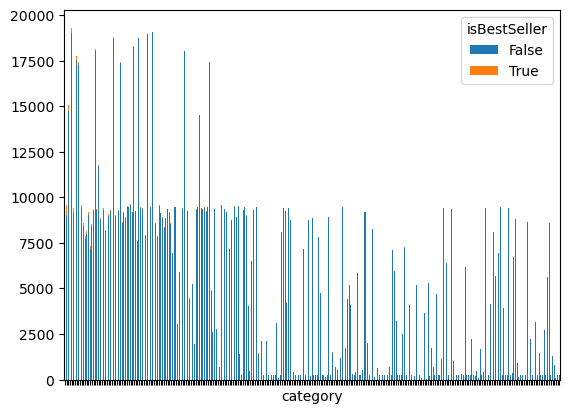

In [82]:
cross.plot(kind='bar', stacked=True)
plt.xticks(visible=False)
plt.show()

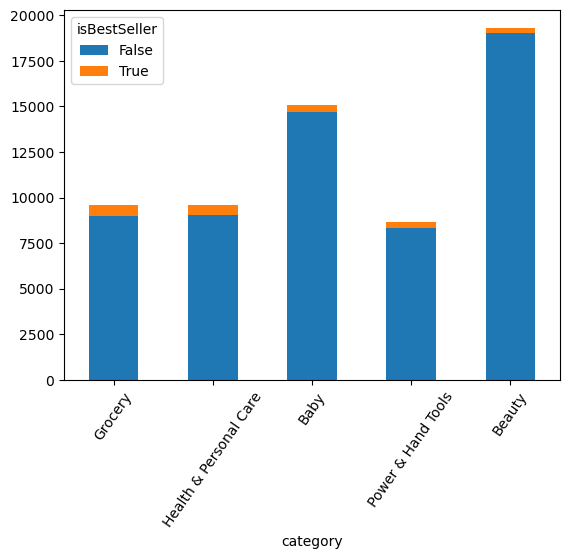

In [86]:
cross.head().plot(kind='bar', stacked=True)
plt.xticks(visible=True,rotation=55)
plt.show()

Then we get the total that shows actually no relationship whatsoever between one category and best sellers